In [16]:
import os
import numpy as np
import pandas as pd


In [17]:
loc ="http://archive.ics.uci.edu/ml/machine-learning-databases/"
ds  ="breast-cancer-wisconsin/breast-cancer-wisconsin.data"
url =loc+ds
data=pd.read_csv(url,sep=",",header=None)

In [18]:
data.columns =["ID", "clumpThickness", "sizeUniformity",
                   "shapeUniformity", "maginalAdhesion", 
                   "singleEpithelialCellSize", "bareNuclei", 
                   "blandChromatin", "normalNucleoli", "mitosis", "class"]

In [19]:
#To determine the number of rows and columns
data.shape

(699, 11)

In [100]:
data.head()

,ID,clumpThickness,sizeUniformity,shapeUniformity,maginalAdhesion,singleEpithelialCellSize,bareNuclei,blandChromatin,normalNucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [29]:
#To determine the frequency of the attributes class
from collections import Counter
Counter(data["class"])

Counter({2: 458, 4: 241})

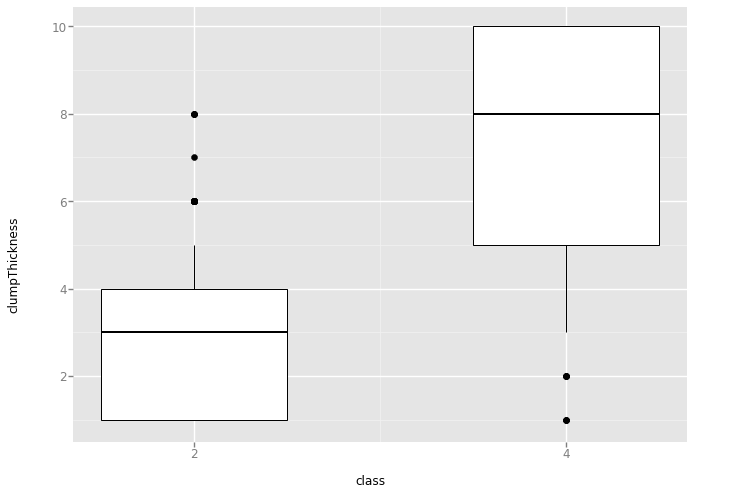

<ggplot: (13274337)>

In [30]:
# To generate the boxplot which shows the distribution of the attribute clumpThickness
# for cases when class=2 and 4 respectively

from ggplot import *
ggplot(aes(x="class",y="clumpThickness"),data=data)+geom_boxplot()

In [28]:
data.isnull().sum()

ID                          0
clumpThickness              0
sizeUniformity              0
shapeUniformity             0
maginalAdhesion             0
singleEpithelialCellSize    0
bareNuclei                  0
blandChromatin              0
normalNucleoli              0
mitosis                     0
class                       0
dtype: int64

In [59]:
Counter(data["bareNuclei"])

Counter(data[data.bareNuclei=="?"]["class"])

Counter({2: 14, 4: 2})

In [92]:
#for i in data["bareNuclei"]=="?":
data["bareNuclei"]=data["bareNuclei"].replace('?',np.nan)
Counter(data["bareNuclei"])


Counter({'1': 402,
         '10': 132,
         '2': 30,
         '4': 19,
         '3': 28,
         '9': 9,
         '7': 8,
         nan: 16,
         '5': 30,
         '8': 21,
         '6': 4})

In [95]:
data=data.dropna(axis=0)

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
ID                          683 non-null int64
clumpThickness              683 non-null int64
sizeUniformity              683 non-null int64
shapeUniformity             683 non-null int64
maginalAdhesion             683 non-null int64
singleEpithelialCellSize    683 non-null int64
bareNuclei                  683 non-null object
blandChromatin              683 non-null int64
normalNucleoli              683 non-null int64
mitosis                     683 non-null int64
class                       683 non-null int64
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [96]:
from sklearn.model_selection import train_test_split

X, y = data.iloc[:, 1:-1].values, data.iloc[:, -1].values #.values convert to array


X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [97]:
for i,j in Counter(y_train).items():
    print(i,":",j/len(y_train))

2 : 0.6506276150627615
4 : 0.3493723849372385


In [98]:
for i,j in Counter(y_test).items():
    print(i,":",j/len(y_test))

2 : 0.6487804878048781
4 : 0.35121951219512193


In [ ]:
from sklearn.datasets import *
from sklearn.tree import DecisionTreeClassifier


X = data.data[:, 2:] # petal length and width, feature dataset
y = data.target #label

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)